In [1]:
import keras
from keras.api import layers
from keras.api.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append("F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition")
from Datasets.DataLoader.DataLoader import DataLoader, LABELS

Libraries Loaded Successfully


In [2]:
DATASET1 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-1"
DATASET2 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-2"
REAL_DATA = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\Real Data"

IMAGE_SIZE = 64
SHRINK = 10
INPUT_SHAPE = (IMAGE_SIZE-2*SHRINK, IMAGE_SIZE-2*SHRINK)
CLASSES = 43

EPOCHS = 20

Loading Files and Dataset ...
Found Categories : ['1-alef', '2-b', '3-p', '4-t', '5-se', '6-jim', '7-che', '8-h', '9-kh', '10-d', '11-zal', '12-r', '13-z', '14-zh', '15-sin', '16-shin', '17-sad', '18-zad', '19-t-long', '20-z-long', '21-ayin', '22-ghyin', '23-f', '24-ghe', '25-k', '26-g', '27-le', '28-m', '29-n', '30-v', '31-he', '32-ye', '33-zero', '34-one', '35-two', '36-three', '37-four', '38-five', '39-six', '40-seven', '41-eight', '42-nine', '43-anewfive'] 

X-Train : (3439, 44, 44)
X-Test : (860, 44, 44)
Y-Train : (3439,)
Y-Test : (860,)


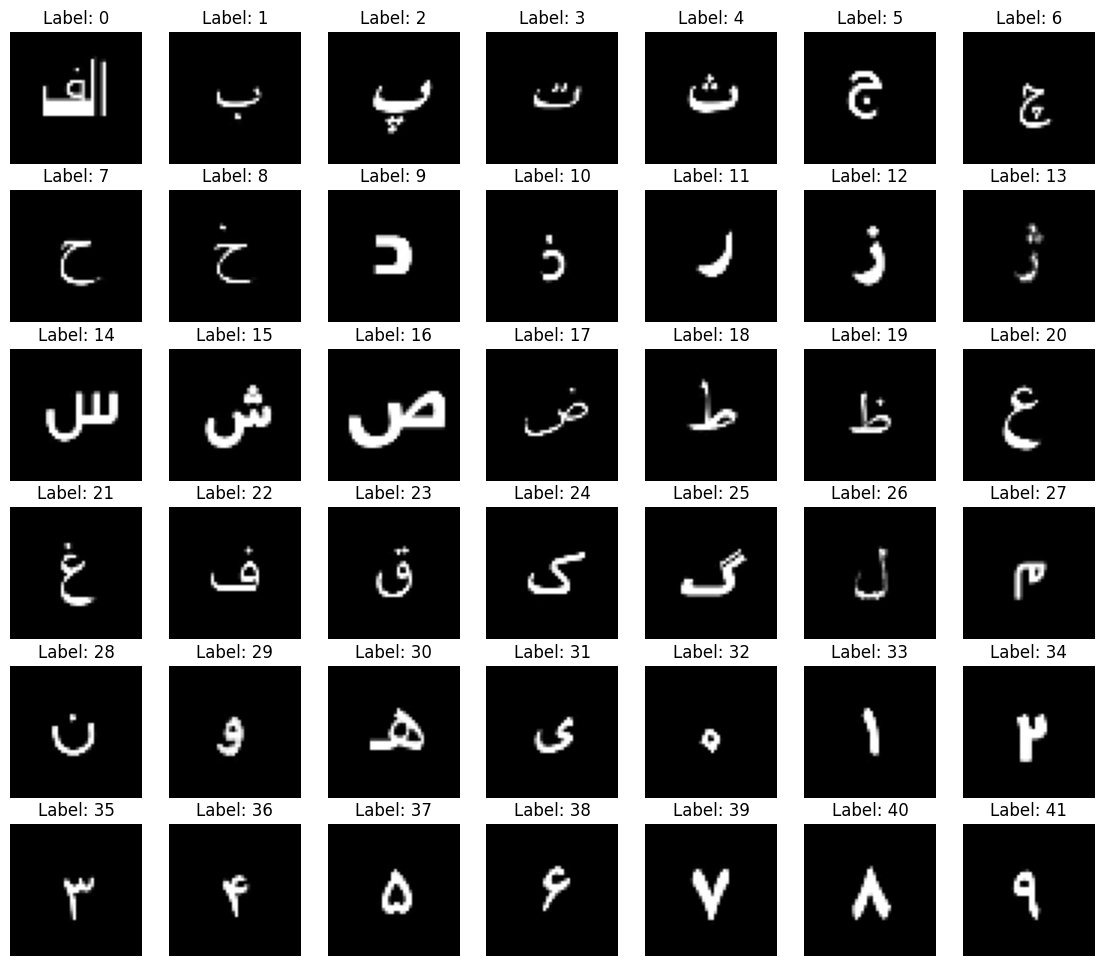

In [3]:
dataloader = DataLoader(path=DATASET1, image_size=IMAGE_SIZE, shrink=SHRINK, padding=0, invert=True)
X, y = dataloader.load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print(f"X-Train : {X_train.shape}")
print(f"X-Test : {X_test.shape}")
print(f"Y-Train : {y_train.shape}")
print(f"Y-Test : {y_test.shape}")

used=[]
counter = 0
i = 0
plt.figure(figsize=(14, 12))
while counter != 42:
    while y_train[i] in used or y_train[i]!=counter:
        i+=1
        continue
    used.append(y_train[i])
    plt.subplot(6, 7, counter + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    counter+=1
plt.show()

In [5]:
model_1 = Sequential(name='Model-1')

model_1.add(layers.Input(shape=INPUT_SHAPE))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(units=2048, activation='relu', use_bias=True, name='Dense_1'))
model_1.add(layers.Dense(units=1024, activation='relu', use_bias=True, name='Dense_2'))
model_1.add(layers.Dense(units=512, activation='relu', use_bias=True, name='Dense_3'))
model_1.add(layers.Dense(units=256, activation='relu', use_bias=True, name='Dense_4'))
model_1.add(layers.Dense(units=64, activation='relu', use_bias=True, name='Dense_5'))
model_1.add(layers.Dense(units=CLASSES, activation='softmax', use_bias=True, name='Dense_6'))

model_1.summary()

Model: "Model-1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 1936)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 2048)           │     3,966,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_5 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_6 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,740,523 (25.71 MB)

 Trainable params: 6,740,523 (25.71 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model_1.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

history = model_1.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_test, y_test))

history_df_1 = pd.DataFrame({
    'Training_Accuracy': history.history['accuracy'],
    'Validation_Accuracy': history.history['val_accuracy'],
    'Training_Loss': history.history['loss'],
    'Validation_Loss': history.history['val_loss']
})

# model_1.save(f"F:/Programming/Python/Machine Learning/Persian-Alphabet-Recognition/Models/Neural Network/{history.history['val_accuracy'][-1]:.4f}_val_acc.keras")

display(history_df_1)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.0241 - loss: 3.7625 - val_accuracy: 0.0198 - val_loss: 3.7619
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0328 - loss: 3.6535 - val_accuracy: 0.0837 - val_loss: 3.1188
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1073 - loss: 2.9350 - val_accuracy: 0.1279 - val_loss: 2.8274
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1609 - loss: 2.5790 - val_accuracy: 0.2500 - val_loss: 2.1472
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2891 - loss: 2.0239 - val_accuracy: 0.3791 - val_loss: 1.8031
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3925 - loss: 1.6997 - val_accuracy: 0.4151 - val_loss: 1.7378
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4554 - loss: 1.5242 - val_accuracy: 0.4407 - val_loss: 1.5534
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4889 - loss: 1.4059 - val_accu

,Training_Accuracy,Validation_Accuracy,Training_Loss,Validation_Loss
0,0.020646,0.019767,3.762309,3.761854
1,0.044199,0.083721,3.465137,3.118839
2,0.111370,0.127907,2.859829,2.827441
3,0.203257,0.250000,2.457703,2.147227
4,0.331492,0.379070,1.924969,1.803082
5,0.407677,0.415116,1.670127,1.737817
6,0.459727,0.440698,1.502274,1.553429
7,0.505961,0.447674,1.373830,1.567624
8,0.541436,0.506977,1.266843,1.508452
9,0.571387,0.561628,1.166438,1.320614


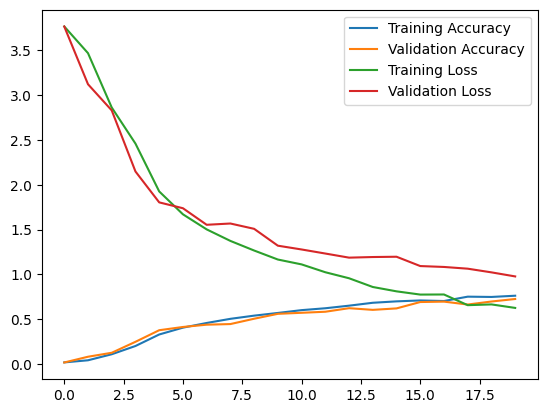

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7261 - loss: 0.9416
Model 1 Test Accuracy: 0.7267
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


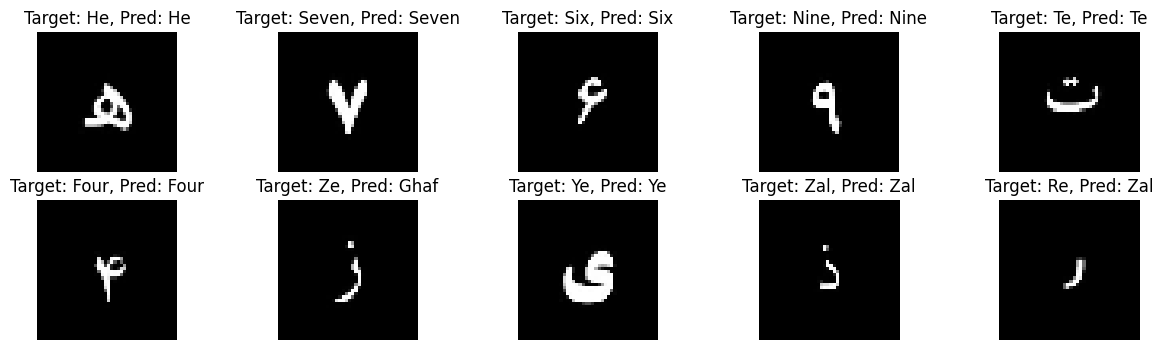

In [9]:
from keras.api.models import load_model

plt.plot(history_df_1['Training_Accuracy'], label='Training Accuracy')
plt.plot(history_df_1['Validation_Accuracy'], label='Validation Accuracy')
plt.plot(history_df_1['Training_Loss'], label='Training Loss')
plt.plot(history_df_1['Validation_Loss'], label='Validation Loss')
plt.legend()
plt.show()


test_loss_1, test_acc_1 = model_1.evaluate(X_test, y_test)
print(f'Model 1 Test Accuracy: {test_acc_1:.4f}')

predictions = model_1.predict(X_test)

used=[]
counter = 0
i = 0
plt.figure(figsize=(15, 4))
while counter != 10:
    while y_test[i] in used:
        i+=1
        continue
    used.append(y_test[i])
    plt.subplot(2, 5, counter + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Target: {LABELS[y_test[i]]}, Pred: {LABELS[np.argmax(predictions[i])]}')
    plt.axis('off')
    counter+=1
plt.show()

In [10]:
model_2 = Sequential(name='Model_2')

model_2.add(layers.Input(shape=(1, INPUT_SHAPE[0], INPUT_SHAPE[1])))


model_2.add(layers.Conv2D(filters=4, kernel_size=7, strides=1, data_format='channels_first', use_bias=True, name='Convolutional_1'))
model_2.add(layers.BatchNormalization(name='Batch_Normalization_1'))
model_2.add(layers.MaxPooling2D(strides=2, data_format='channels_first', name='Max_Pooling_1'))

model_2.add(layers.Dropout(0.25 , name='Drop_out_1'))

model_2.add(layers.Conv2D(filters=8, kernel_size=6, strides=1, data_format='channels_first', use_bias=True, name='Convolutional_2'))
model_2.add(layers.BatchNormalization(name='Batch_Normalization_2'))
model_2.add(layers.MaxPooling2D(strides=2, data_format='channels_first', name='Max_Pooling_2'))

model_2.add(layers.Dropout(0.25 , name='Drop_out_2'))

model_2.add(layers.Flatten(data_format='channels_first', name='Flattening'))

model_2.add(layers.Dense(512, activation='relu', use_bias=True, name='Fully_Connected_1'))
model_2.add(layers.Dense(256, activation='relu', use_bias=True, name='Fully_Connected_2'))
model_2.add(layers.Dense(CLASSES, activation='softmax', use_bias=True, name='Fully_Connected_3'))

model_2.summary()

Model: "Model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Convolutional_1 (Conv2D)        │ (None, 4, 38, 38)      │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Batch_Normalization_1           │ (None, 4, 38, 38)      │           152 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Max_Pooling_1 (MaxPooling2D)    │ (None, 4, 19, 19)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_out_1 (Dropout)            │ (None, 4, 19, 19)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Convolutional_2 (Conv2D)        │ (None, 8, 14, 14)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Batch_Normalization_2           │ (None, 8, 14, 14)      │            56 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Max_Pooling_2 (MaxPooling2D)    │ (None, 8, 7, 7)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_out_2 (Dropout)            │ (None, 8, 7, 7)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flattening (Flatten)            │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Fully_Connected_1 (Dense)       │ (None, 512)            │       201,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Fully_Connected_2 (Dense)       │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Fully_Connected_3 (Dense)       │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 345,163 (1.32 MB)

 Trainable params: 345,059 (1.32 MB)

 Non-trainable params: 104 (416.00 B)

In [11]:
model_2.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

history_2 = model_2.fit(X_train.reshape(3439, 1, INPUT_SHAPE[0], INPUT_SHAPE[1]), y_train, epochs=EPOCHS, validation_data=(X_test.reshape(860, 1, INPUT_SHAPE[0], INPUT_SHAPE[1]), y_test))

history_df_2 = pd.DataFrame({
    'Training_Accuracy': history_2.history['accuracy'],
    'Validation_Accuracy': history_2.history['val_accuracy'],
    'Training_Loss': history_2.history['loss'],
    'Validation_Loss': history_2.history['val_loss']
})

# model_1.save(f"F:/Programming/Python/Machine Learning/Persian-Alphabet-Recognition/Models/Neural Network/{history.history['val_accuracy'][-1]:.4f}_val_acc.keras")

display(history_df_2)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.2142 - loss: 2.9828 - val_accuracy: 0.0291 - val_loss: 3.7448
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.7055 - loss: 0.8494 - val_accuracy: 0.0628 - val_loss: 3.7151
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.7884 - loss: 0.6062 - val_accuracy: 0.0686 - val_loss: 3.5610
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.8314 - loss: 0.4770 - val_accuracy: 0.2419 - val_loss: 2.7731
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.8514 - loss: 0.4259 - val_accuracy: 0.6895 - val_loss: 1.2161
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.8633 - loss: 0.3786 - val_accuracy: 0.7872 - val_loss: 0.6152
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.8902 - loss: 0.3153 - val_accuracy: 0.8628 - val_loss: 0.4110
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.8917 - loss: 0.3083 - val_acc

,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss
0,0.414946,0.029070,2.091680,3.744838
1,0.717941,0.062791,0.801735,3.715102
2,0.792963,0.068605,0.586243,3.561029
3,0.832219,0.241860,0.475922,2.773134
4,0.849956,0.689535,0.417477,1.216116
5,0.862169,0.787209,0.369550,0.615234
6,0.883106,0.862791,0.324547,0.410962
7,0.895028,0.869767,0.292093,0.355351
8,0.903460,0.820930,0.262070,0.535483
9,0.910439,0.884884,0.247267,0.312294


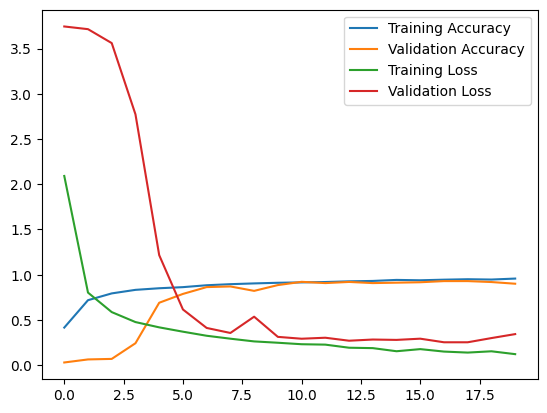

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8977 - loss: 0.3388
Model 2 Test Accuracy: 0.9000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


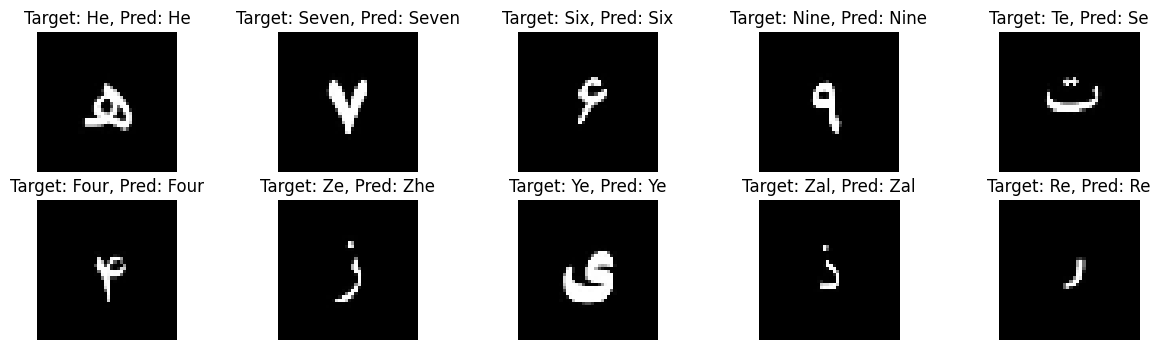

In [16]:

plt.plot(history_df_2['Training Accuracy'], label='Training Accuracy')
plt.plot(history_df_2['Validation Accuracy'], label='Validation Accuracy')
plt.plot(history_df_2['Training Loss'], label='Training Loss')
plt.plot(history_df_2['Validation Loss'], label='Validation Loss')
plt.legend()
plt.show()

test_loss_2, test_acc_2 = model_2.evaluate(X_test.reshape(860, 1, INPUT_SHAPE[0], INPUT_SHAPE[1]), y_test)
print(f'Model 2 Test Accuracy: {test_acc_2:.4f}')

# loaded_model = load_model(f"F:/Programming/Python/Machine Learning/Persian-Alphabet-Recognition/Models/Neural Network/{test_acc_2:.4f}_val_acc.keras")

predictions_2 = model_2.predict(X_test.reshape(860, 1, INPUT_SHAPE[0], INPUT_SHAPE[1]))

used=[]
counter = 0
i = 0
plt.figure(figsize=(15, 4))
while counter != 10:
    while y_test[i] in used:
        i+=1
        continue
    used.append(y_test[i])
    plt.subplot(2, 5, counter + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Target: {LABELS[y_test[i]]}, Pred: {LABELS[np.argmax(predictions_2[i])]}')
    plt.axis('off')
    counter+=1
plt.show()
plt.show()

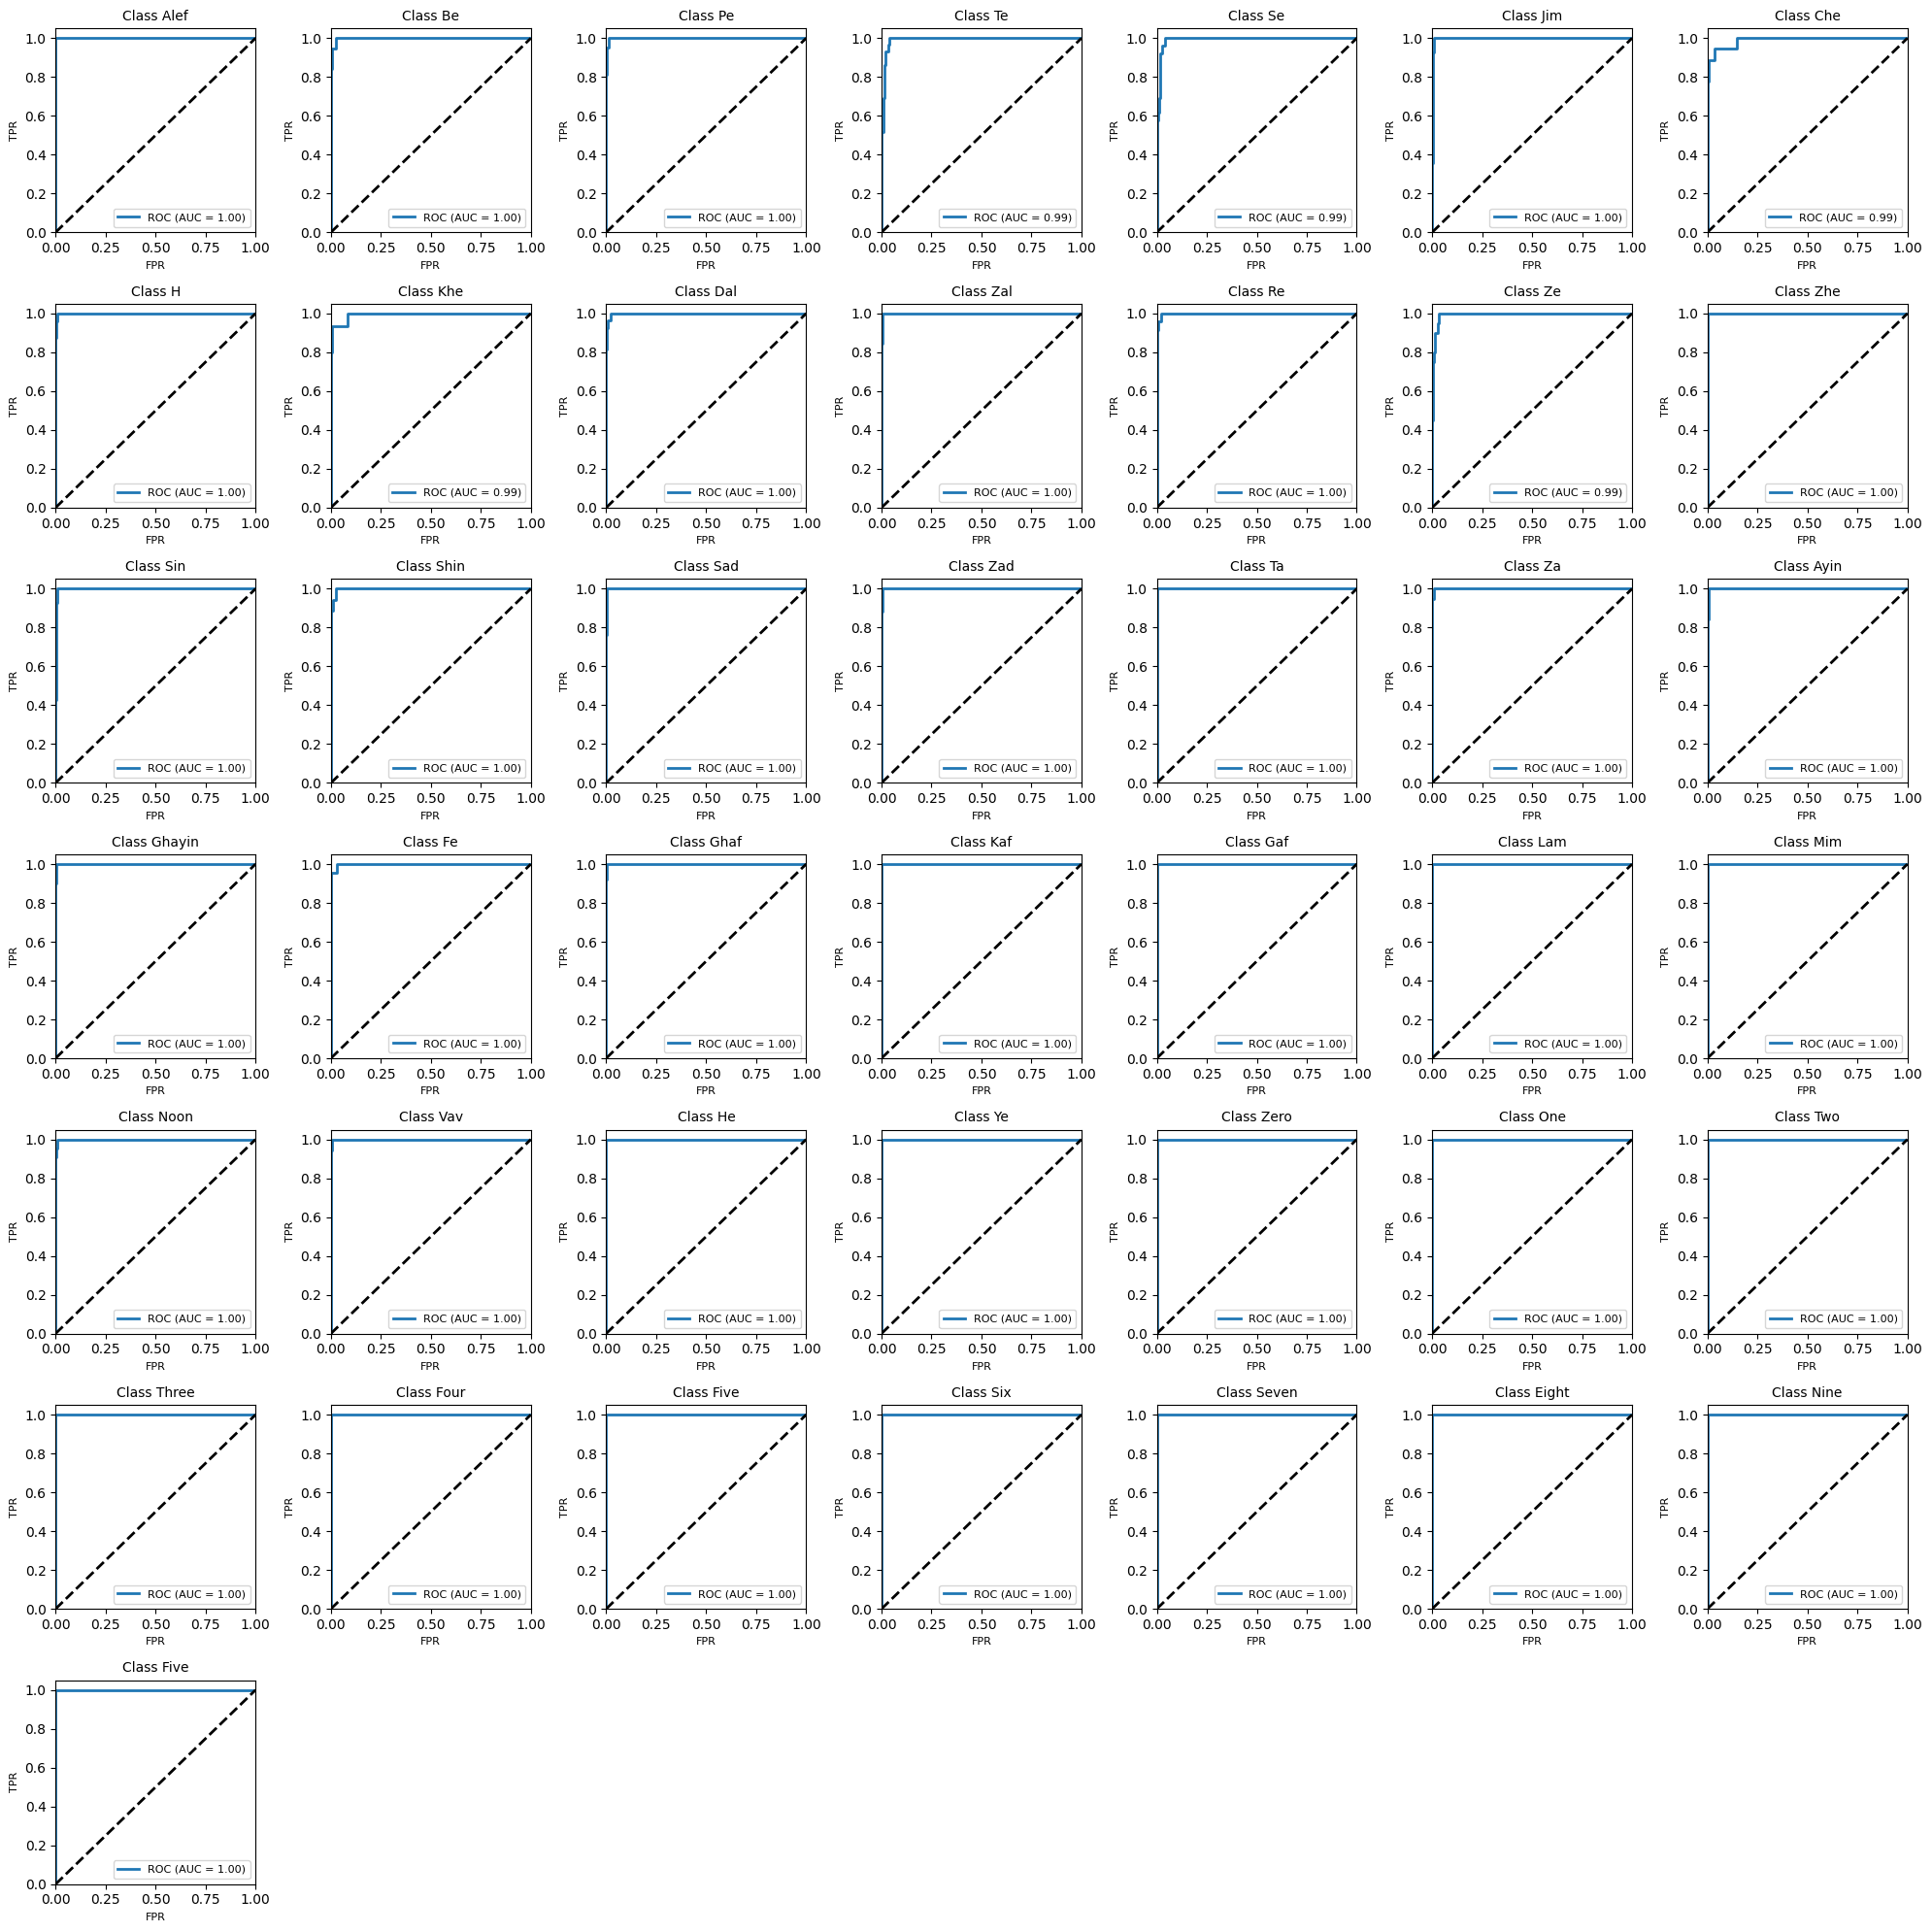

In [17]:
from keras.api.utils import to_categorical
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_test_one_hot = to_categorical(y_test, num_classes=CLASSES)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], predictions_2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


n_rows = 7  
n_cols = 7  


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 20))

axes = axes.flatten()

for i in range(CLASSES):
    ax = axes[i]
    ax.plot(fpr[i], tpr[i], lw=2, label=f'ROC (AUC = {roc_auc[i]:0.2f})')
    ax.plot([0, 1], [0, 1], 'k--', lw=2)

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title(f'Class {LABELS[i]}', fontsize=10)
    ax.legend(loc='lower right', fontsize=8)
    ax.set_xlabel('FPR', fontsize=8)
    ax.set_ylabel('TPR', fontsize=8)

for i in range(CLASSES, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [18]:
import os
import cv2 as cv


image_path = os.path.join(REAL_DATA, 'jim2.png')

image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

print(image.shape)

predictions_test = model_2.predict(image.reshape(1,1,64,64))

print(predictions_test.shape)

plt.imshow(image, cmap='gray')
plt.title(f'Pred: {LABELS[np.argmax(predictions_test)]}')
plt.axis('off')

(64, 64)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "Batch_Normalization_1" is incompatible with the layer: expected axis -1 of input shape to have value 38, but received input with shape (1, 4, 58, 58)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 1, 64, 64), dtype=uint8)
  • training=False
  • mask=None